#### Redg.No.-24MDT0170
#### Name- Anish Kuamr Barik
#### ML_Expt_No.-09

#### Q1. Today we will try to see how we can use SVM to perform classification on a binary classification problem.

In [2]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [6]:
X,y = make_classification(n_samples=100,n_features=2, n_redundant=0, n_classes=2,random_state=42)
##Perform Min-Max scaling for the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [12]:
#implement SVM with linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

#Check the accuracy of your model. Further try to plot the decision boundary as we did in the case of softmax regression
accuracy_score(y_test,y_pred)

0.95

In [14]:
x_min,x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min,y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min,y_max,200))
Z = svm.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

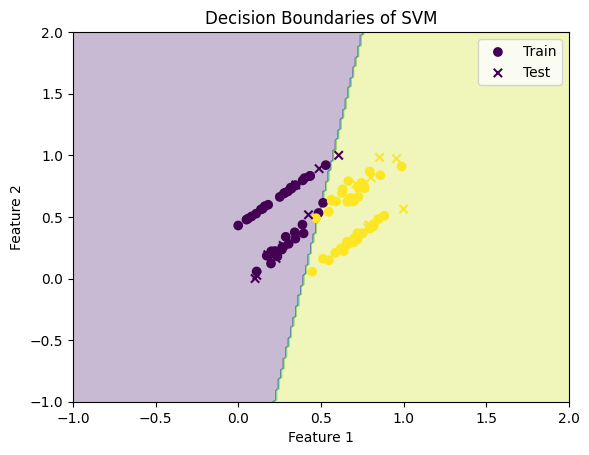

In [18]:
import matplotlib.pyplot as plt
plt.contourf (xx, yy, Z,alpha=0.3)
plt.scatter(X_train[:,0], X_train[:,1],c=y_train, label='Train')
plt.scatter(X_test[:,0], X_test[:,1],c=y_test,marker='x',label='Test')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundaries of SVM")
plt.legend()
plt.show()

In [22]:
#Now you can check the other kernels like polynomial kernel with a specific value of d and Coef0 which is the value of c in the polynomial kernel
svmpoly = SVC(kernel='poly', degree=2, coef0=1)
svmpoly.fit(X_train,y_train)



SVC(coef0=1, degree=2, kernel='poly')

In [30]:
#Here you can perform hyperparameter tuning on the parameters degree and coef0 values and determine the best result you can obtain. And plot the decision boundary in that case

from sklearn.model_selection import GridSearchCV
parm_grid = {'degree':[2,3,4,5,6],
              'coef0':[1,1.2,1.5,2,2.5]}
svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=parm_grid, scoring='accuracy' ,n_jobs=-1,cv=5)
grid_search.fit(X_train,y_train)



GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'coef0': [1, 1.2, 1.5, 2, 2.5],
                         'degree': [2, 3, 4, 5, 6]},
             scoring='accuracy')

In [32]:
print("Best score: ",grid_search.best_score_)
print("Best params: ",grid_search.best_params_)

Best score:  0.9625
Best params:  {'coef0': 1, 'degree': 2}


In [34]:
sv = grid_search.best_estimator_
sv. fit(X_train, y_train)
y_pred = sv.predict(X_test)
print(accuracy_score(y_test,y_pred))


1.0


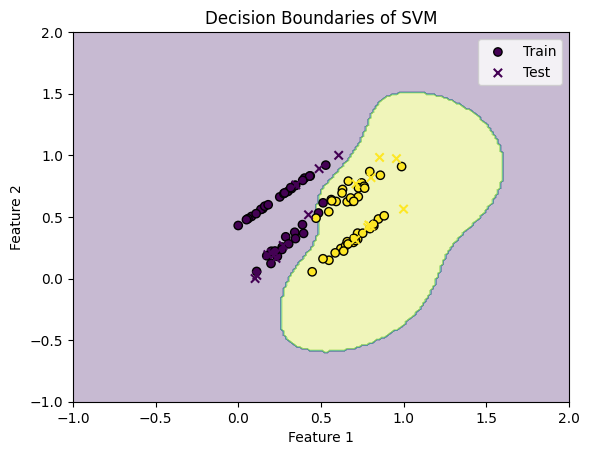

In [36]:
xx_min,x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min,y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx,yy = np.meshgrid(np.linspace(x_min,x_max, 200) ,np.linspace(y_min, y_max, 200))
Z = sv.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf (xx, yy,Z,alpha=0.3)
plt.scatter(X_train[:,0], X_train[:,1],c=y_train, edgecolors='k', label='Train')
plt.scatter(X_test[:,0], X_test[:,1],c=y_test,marker='x',label='Test')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundaries of SVM")
plt.legend()
plt.show()

In [38]:
#Now to use rbf kernel with the hyperparameter value Gamma you can use this code.

svm_rbf = SVC(kernel='rbf', gamma=20)
svm_rbf.fit(X_train,y_train)

SVC(gamma=20)

In [42]:
#Now here you can perform hyperparameter tuning on the parameter gamma by giving a range of values for gamma, which usually takes avalue greater than 0. determine the best result you can obtain. And plot the decision boundary in that case

parm_grid = {'gamma' :range(20,100)}
svm_rbf = SVC(kernel='rbf' )
grid_search = GridSearchCV(estimator=svm_rbf, param_grid=parm_grid, scoring='accuracy' ,n_jobs=-1,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': range(20, 100)}, scoring='accuracy')

In [44]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
best_model.predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0])

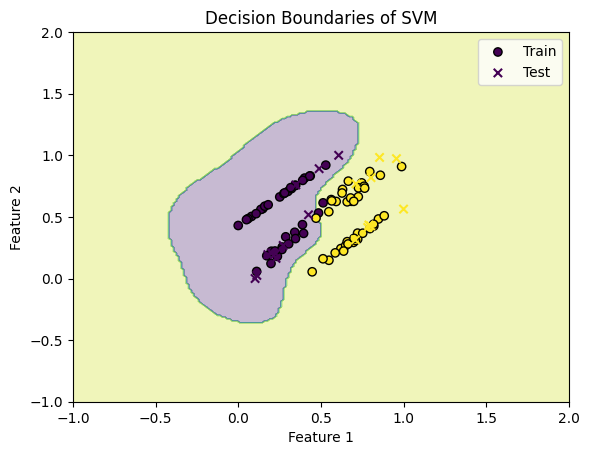

In [46]:
x_min,x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min,y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min,x_max, 200),np.linspace(y_min, y_max, 200))
Z = best_model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf (xx, yy,Z,alpha=0.3)
plt.scatter(X_train[:,0], X_train[:,1],c=y_train, edgecolors='k', label='Train')
plt.scatter(X_test[:,0], X_test[:,1],c=y_test,marker='x',label='Test')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundaries of SVM")
plt.legend()
plt.show()

#### 2.PCA

In [49]:
#We will see how we can use PCA and perform regression in the book1.csv dataset which is a house price dataset
df = pd.read_csv("Book1.csv")
df. head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
0,13300000,7420,4,2,3,2,furnished
1,12250000,8960,4,4,4,3,furnished
2,12250000,9960,3,2,2,2,semi-furnished
3,12215000,7500,4,2,2,3,furnished
4,11410000,7420,4,1,2,2,furnished


In [51]:
##drop furnishingstatus col
df.drop(columns=['furnishingstatus' ], inplace=True)

In [53]:
#Scale the data using min max scaling to obtain the data matrix X scaled.
X_scaled = scaler.fit_transform(df)

X=X_scaled[:,1:]
y=X_scaled[:,:1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

### Fit the data using multiple regression and decision tree and find the value of mean squared error in both the cases.

In [64]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Multiple Linear Regression mean_squared_error: ", mean_squared_error(y_test,lr_pred))

Multiple Linear Regression mean_squared_error:  0.021534742753057973


In [72]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_pred = dtr.predict(X_test)
print("DecisionTreeRegressor mean_squared_error:",mean_squared_error(y_test,dtr_pred))


DecisionTreeRegressor mean_squared_error: 0.07753823302491324


In [74]:
## Create a matrix which contains only the scaled feature values, not the target variable, and name it as Xfeatures.
Xfeatures = X_scaled[:,1:]

In [76]:
#Now let us use PCA to reduce the features we have in our data to three features or a 3-dimensional data.

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(Xfeatures)

In [86]:
#Perform train test split and fit the models and find the errors in the case of both the models, multiple regression and decision tree by using the new three features we have obtained using PCA.
Xp=X_pca
yp=X_scaled[:,:1]
X_train,X_test,y_train,y_test = train_test_split(Xp, yp, test_size=0.2,random_state=42)
lr_pca = LinearRegression()

lr_pca.fit(X_train,y_train)
lr_pca_pred = lr_pca.predict(X_test)

dtr_pca = DecisionTreeRegressor()
dtr_pca.fit(X_train,y_train)
dtr_pca_pred = dtr_pca.predict(X_test)

print("Multiple Linear Regression mean_squared_error: ", mean_squared_error(y_test,lr_pca_pred))
print("DecisionTreeRegressor mean_squared_error: ", mean_squared_error(y_test,dtr_pca_pred))


Multiple Linear Regression mean_squared_error:  0.023257890381643494
DecisionTreeRegressor mean_squared_error:  0.06575362760165791
